# Regression using Neural Network

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

## Creating datset

In [2]:
data=make_regression(n_samples=1000,n_features=5,noise=.2,random_state=42)

In [3]:
X=data[0]
y=data[1]

## Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

## train-test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

## Convert to Torch Tensors

In [8]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test  = torch.tensor(X_test, dtype=torch.float32)
y_test  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

## Building Neural Network

In [9]:
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(5, 16)
        self.layer2 = nn.Linear(16, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output(x)
        return x

## Create model object

In [10]:
model = RegressionModel()

In [11]:
print(model)

RegressionModel(
  (layer1): Linear(in_features=5, out_features=16, bias=True)
  (layer2): Linear(in_features=16, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)


In [12]:
pip install torchsummary

Note: you may need to restart the kernel to use updated packages.


In [13]:
from torchsummary import summary
summary(model, input_size=(5,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 16]              96
            Linear-2                   [-1, 16]             272
            Linear-3                    [-1, 1]              17
Total params: 385
Trainable params: 385
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


## Loss function

In [14]:
loss_fn=nn.MSELoss()

## Define optimizer

In [15]:
optimizer=optim.Adam(model.parameters(), lr=0.01)

## Training loop

In [16]:
epochs = 500
losses = []
for epoch in range(epochs):
    predictions = model(X_train)
    loss = loss_fn(predictions, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item()}")

Epoch 0 | Loss: 4311.35791015625
Epoch 50 | Loss: 1132.51708984375
Epoch 100 | Loss: 59.208431243896484
Epoch 150 | Loss: 20.226613998413086
Epoch 200 | Loss: 9.228961944580078
Epoch 250 | Loss: 4.4426350593566895
Epoch 300 | Loss: 2.856497287750244
Epoch 350 | Loss: 2.1969382762908936
Epoch 400 | Loss: 1.7453693151474
Epoch 450 | Loss: 1.3986420631408691


In [17]:
model.eval() 

with torch.no_grad():   
    test_predictions = model(X_test)

## Plot prediction

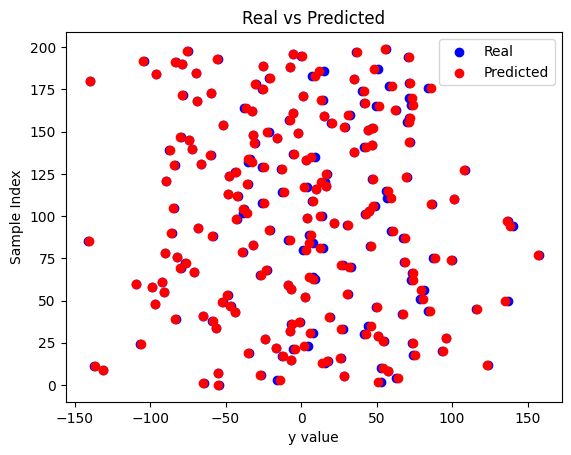

In [20]:
plt.scatter(y_test.numpy(), range(len(y_test)), color='blue', label='Real')
plt.scatter(test_predictions.numpy(), range(len(test_predictions)), color='red', label='Predicted')


plt.xlabel("y value")
plt.ylabel("Sample Index")
plt.title("Real vs Predicted")
plt.legend()
plt.show()

# The End